In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../../../..")

print('Current location: ', os.getcwd())

Current location:  /Users/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [4]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_bar_plot_for_model_selection

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'


## Initialize Configs

In [5]:
DB_COLLECTION_NAME = 'one_repair_lvl_many_models'
DATASET_NAME = 'Law_School'
EXPERIMENT_SESSION_UUID = '4cf91163-5230-4c95-aad2-e5c836aaa784'
SENSITIVE_ATTRS = ['male', 'race', 'male&race']
MODEL_NAMES = ['LogisticRegression']
# MODEL_NAMES = ['LGBMClassifier', 'LogisticRegression', 'RandomForestClassifier', 'MLPClassifier']

In [6]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [7]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [8]:
# Append Test_Set_Index to each result set for models
for model_name in models_metrics_dct.keys():
    models_metrics_dct[model_name]['Test_Set_Index'] = 0

In [9]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(18, 33)

In [10]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,Dataset_Split_Seed,...,male_priv_correct,male_priv_incorrect,overall,race_dis,race_dis_correct,race_dis_incorrect,race_priv,race_priv_correct,race_priv_incorrect,Test_Set_Index
0,Accuracy,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Law_School,20,OK,2024-01-03 00:14:14.644,4cf91163-5230-4c95-aad2-e5c836aaa784,Exp_iter_1,100,...,1.000000,0.000000,0.884231,0.709069,1.000000,0.000000,0.918410,1.000000,0.000000,0
1,Aleatoric_Uncertainty,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Law_School,20,OK,2024-01-03 00:14:14.644,4cf91163-5230-4c95-aad2-e5c836aaa784,Exp_iter_1,100,...,0.409157,0.646475,0.439931,0.470024,0.411781,0.611976,0.434059,0.412622,0.675360,0
2,F1,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Law_School,20,OK,2024-01-03 00:14:14.644,4cf91163-5230-4c95-aad2-e5c836aaa784,Exp_iter_1,100,...,1.000000,0.000000,0.938458,0.829773,1.000000,0.000000,0.957388,1.000000,0.000000,0
3,FNR,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Law_School,20,OK,2024-01-03 00:14:14.644,4cf91163-5230-4c95-aad2-e5c836aaa784,Exp_iter_1,100,...,0.000000,1.000000,0.003041,0.000000,0.000000,NaN,0.003498,0.000000,1.000000,0
4,FPR,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Law_School,20,OK,2024-01-03 00:14:14.644,4cf91163-5230-4c95-aad2-e5c836aaa784,Exp_iter_1,100,...,0.000000,1.000000,0.986577,1.000000,NaN,1.000000,0.977077,0.000000,1.000000,0
5,IQR,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Law_School,20,OK,2024-01-03 00:14:14.644,4cf91163-5230-4c95-aad2-e5c836aaa784,Exp_iter_1,100,...,0.005816,0.009754,0.006377,0.006878,0.005801,0.009504,0.006280,0.005917,0.010357,0
6,Jitter,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Law_School,20,OK,2024-01-03 00:14:14.644,4cf91163-5230-4c95-aad2-e5c836aaa784,Exp_iter_1,100,...,0.000420,0.003537,0.000876,0.000465,0.000656,0.000000,0.000956,0.000317,0.008139,0
7,Label_Stability,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Law_School,20,OK,2024-01-03 00:14:14.644,4cf91163-5230-4c95-aad2-e5c836aaa784,Exp_iter_1,100,...,0.999494,0.995223,0.998865,0.999411,0.999169,1.000000,0.998759,0.999625,0.989014,0
8,Mean_Prediction,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Law_School,20,OK,2024-01-03 00:14:14.644,4cf91163-5230-4c95-aad2-e5c836aaa784,Exp_iter_1,100,...,0.096946,0.186152,0.108963,0.114573,0.094272,0.164051,0.107869,0.098943,0.208345,0
9,Overall_Uncertainty,LogisticRegression,"{'C': 1, 'class_weight': None, 'dual': False, ...",Law_School,20,OK,2024-01-03 00:14:14.644,4cf91163-5230-4c95-aad2-e5c836aaa784,Exp_iter_1,100,...,0.409355,0.646759,0.440141,0.470241,0.411973,0.612254,0.434268,0.412823,0.675657,0


In [11]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [12]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

## Figure 1. Subgroup boxplots.

In [13]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [14]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

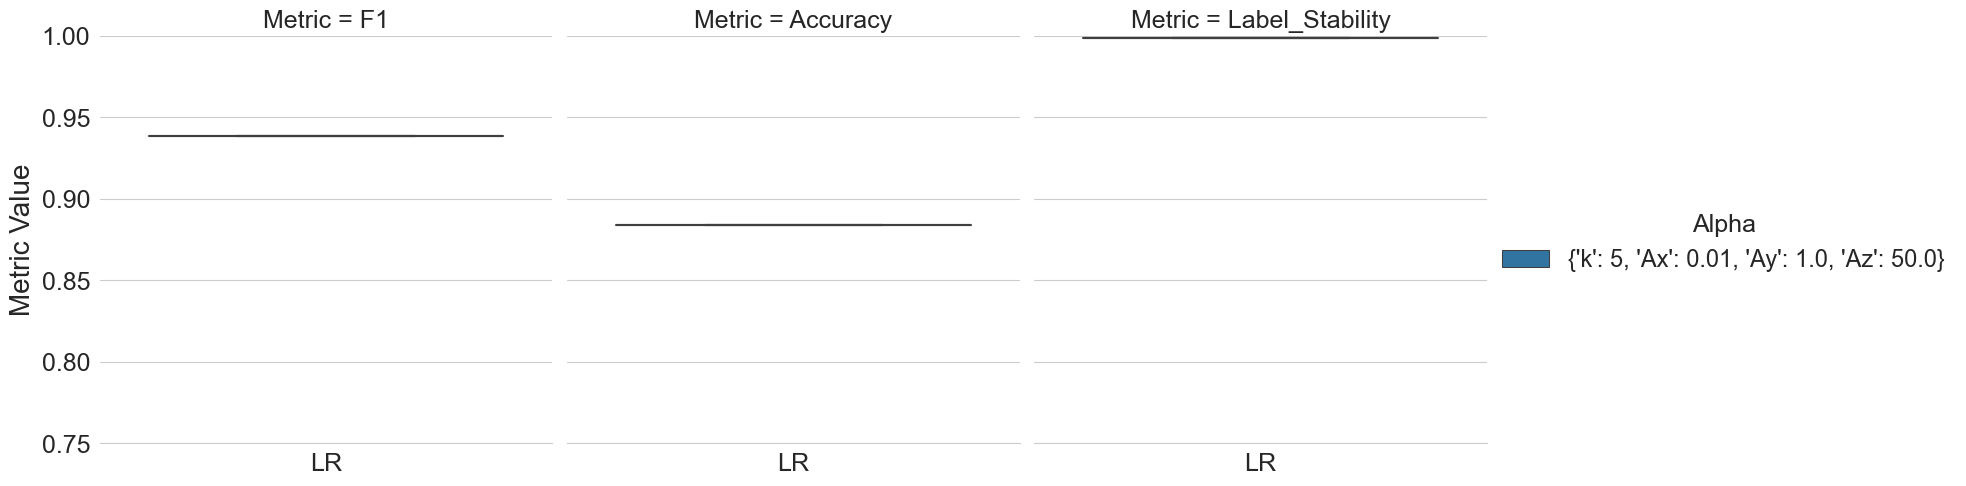

In [15]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.75, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

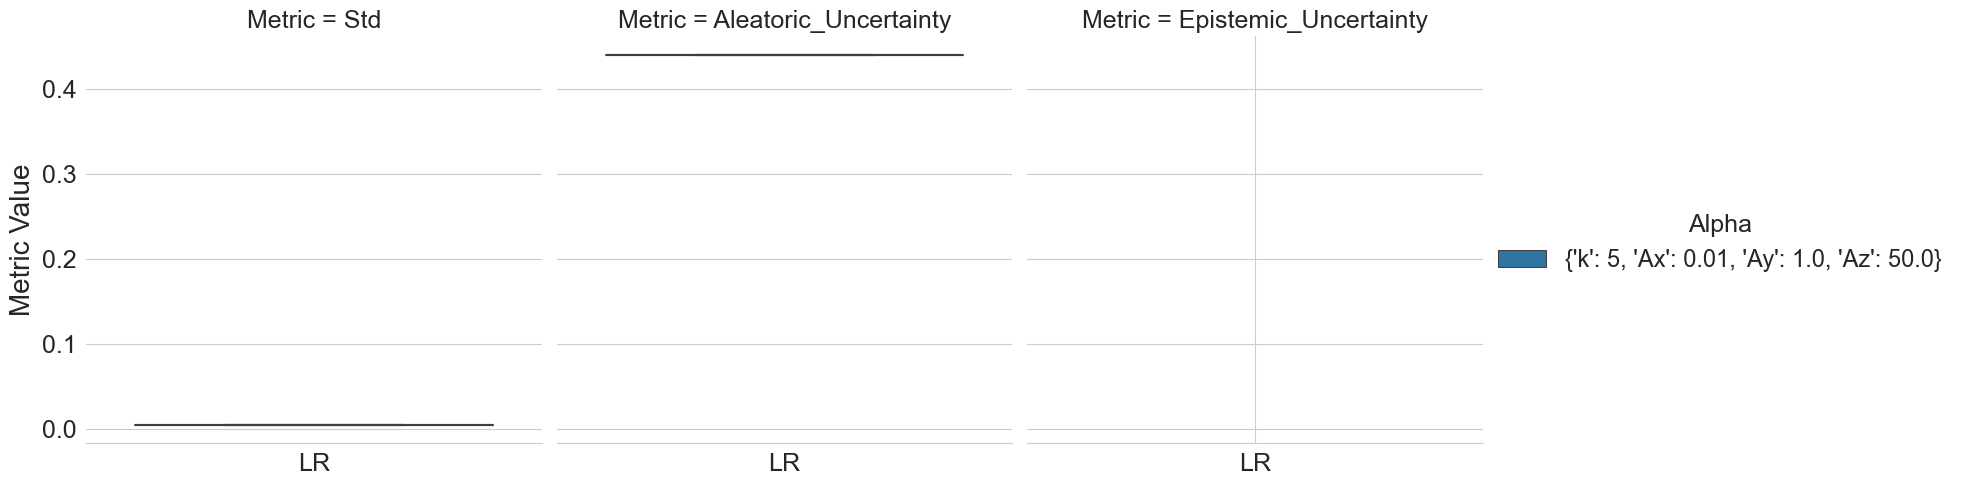

In [16]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           metric_names=['Std', 'Aleatoric_Uncertainty', 'Epistemic_Uncertainty'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

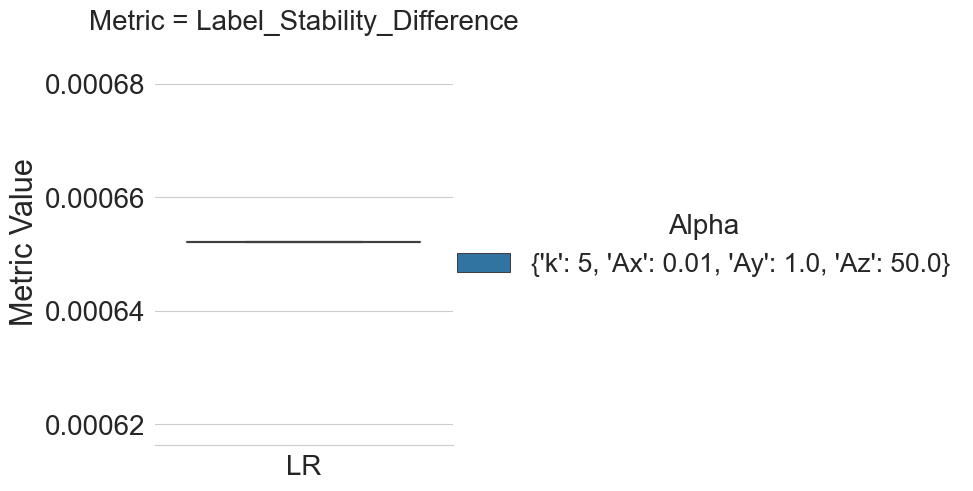

In [17]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='race',
                                           metric_names=['Label_Stability_Difference'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

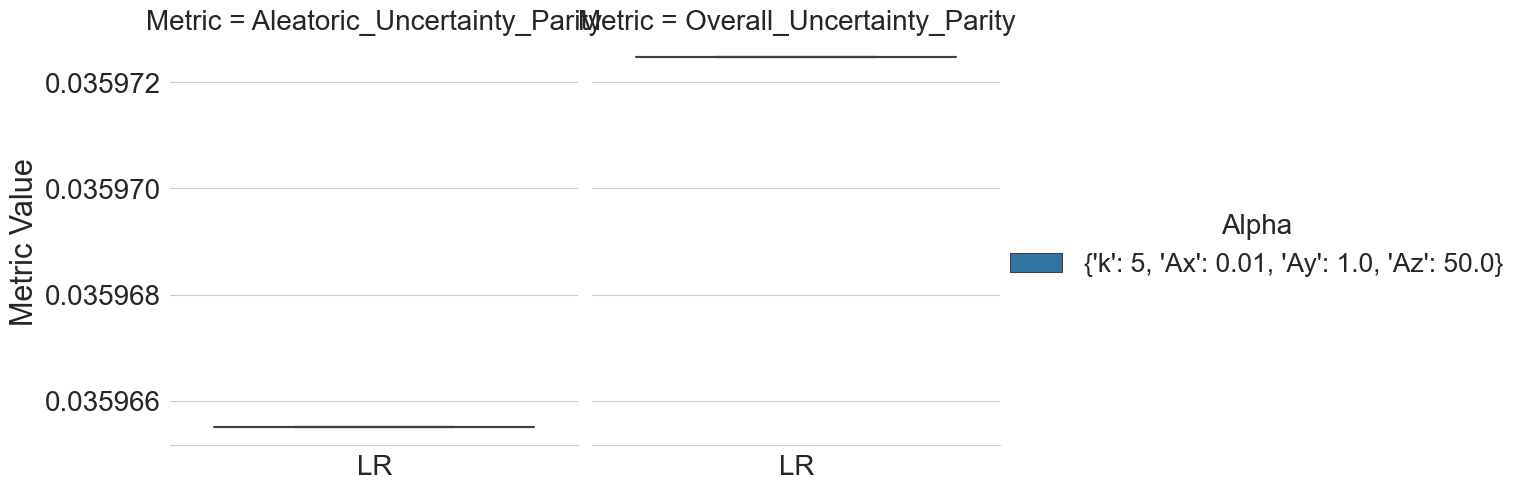

In [18]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='race',
                                           metric_names=['Aleatoric_Uncertainty_Parity',
                                                         'Overall_Uncertainty_Parity'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

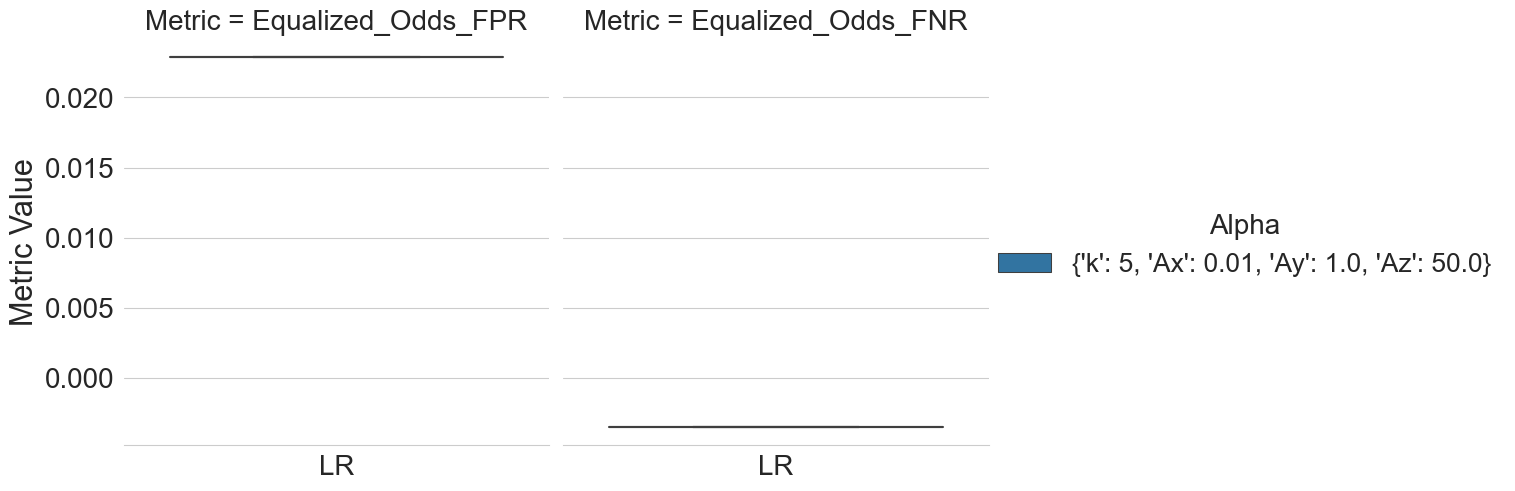

In [19]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='race',
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

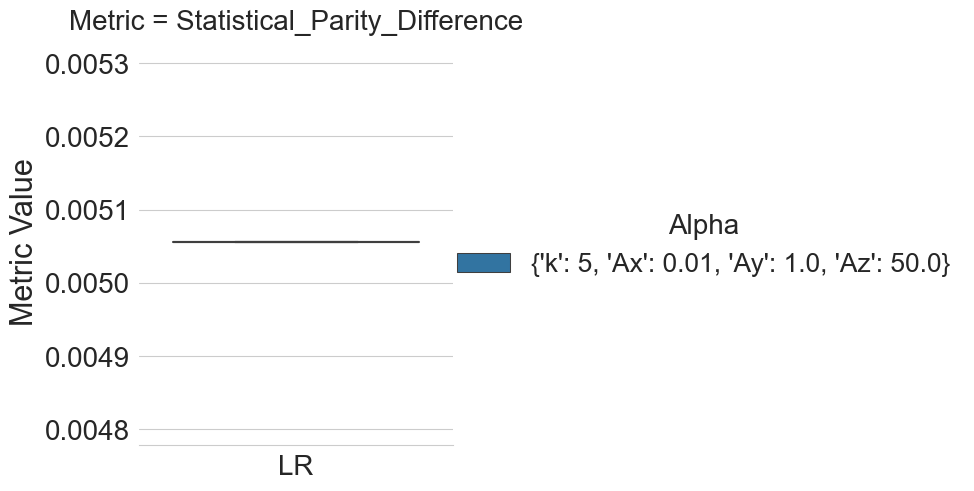

In [20]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='race',
                                           metric_names=['Statistical_Parity_Difference'],
                                           vals_to_replace=vals_to_replace)